In [ ]:
#https://dev.meteostat.net/formats.html#time-format

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from meteostat import Hourly
from datetime import datetime, timedelta
import missingno as msno
pd.set_option('display.max_columns',None)

In [134]:
start = datetime(2017,1,1)
end = datetime(2022,11,1,23,59)

data = Hourly('10729', start, end)
data = data.fetch()

df = data.reset_index()

In [135]:
df

time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0     2017-01-01 00:00:00  -3.6  -3.9  98.0   0.0   NaN  150.0   6.5   NaN   
1     2017-01-01 01:00:00  -3.8  -3.9  99.0   0.0   NaN  140.0   7.9   NaN   
2     2017-01-01 02:00:00  -3.4  -3.5  99.0   0.0   NaN  140.0   7.2   NaN   
3     2017-01-01 03:00:00  -3.4  -3.5  99.0   0.0   NaN  160.0   6.5   NaN   
4     2017-01-01 04:00:00  -3.5  -3.6  99.0   0.0   NaN  150.0   5.4   NaN   
...                   ...   ...   ...   ...   ...   ...    ...   ...   ...   
51139 2022-11-01 19:00:00  11.4   8.3  81.0   0.0   0.0  140.0   6.8  11.0   
51140 2022-11-01 20:00:00  10.9   8.1  83.0   0.0   0.0  140.0   7.6  13.0   
51141 2022-11-01 21:00:00  10.3   8.2  87.0   0.0   0.0  140.0   7.9  13.0   
51142 2022-11-01 22:00:00  10.1   8.2  88.0   0.0   0.0  150.0  10.4  15.0   
51143 2022-11-01 23:00:00  10.3   7.9  85.0   0.0   0.0  150.0  10.4  16.0   

         pres  tsun  coco  
0      1030.1   NaN   NaN  
1      1029.3   NaN   NaN  
2      1028.6   NaN   NaN  
3      1028.1   0.0   NaN  
4      1027.4   0.0   NaN  
...       ...   ...   ...  
51139  1022.1   0.0   1.0  
51140  1022.0   0.0   1.0  
51141  1022.6   0.0   1.0  
51142  1022.9   0.0   4.0  
51143  1022.8   0.0   4.0  

[51144 rows x 12 columns]

In [136]:
px.line(df,'time','prcp')

<AxesSubplot:xlabel='coco', ylabel='temp'>

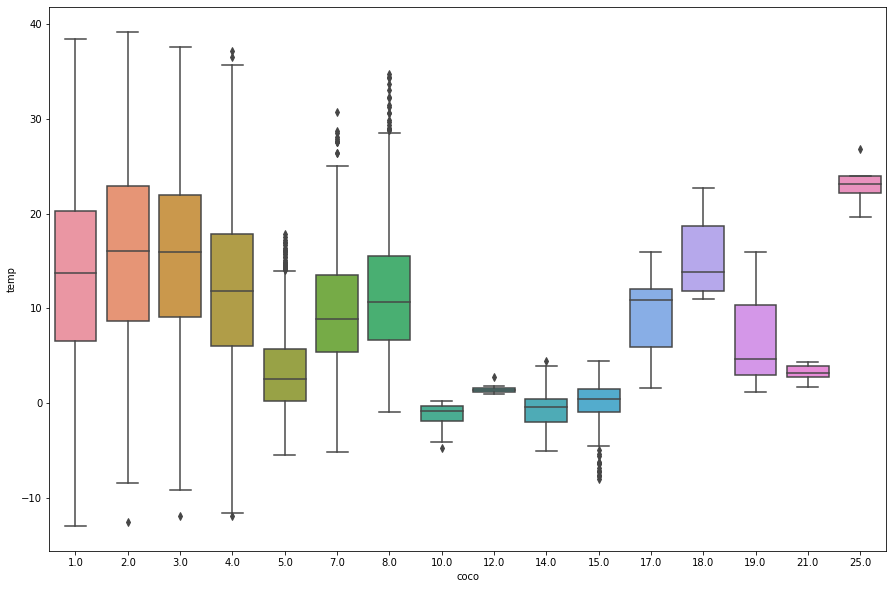

In [137]:
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.boxplot(data=df, x='coco', y='temp')

<AxesSubplot:xlabel='coco', ylabel='rhum'>

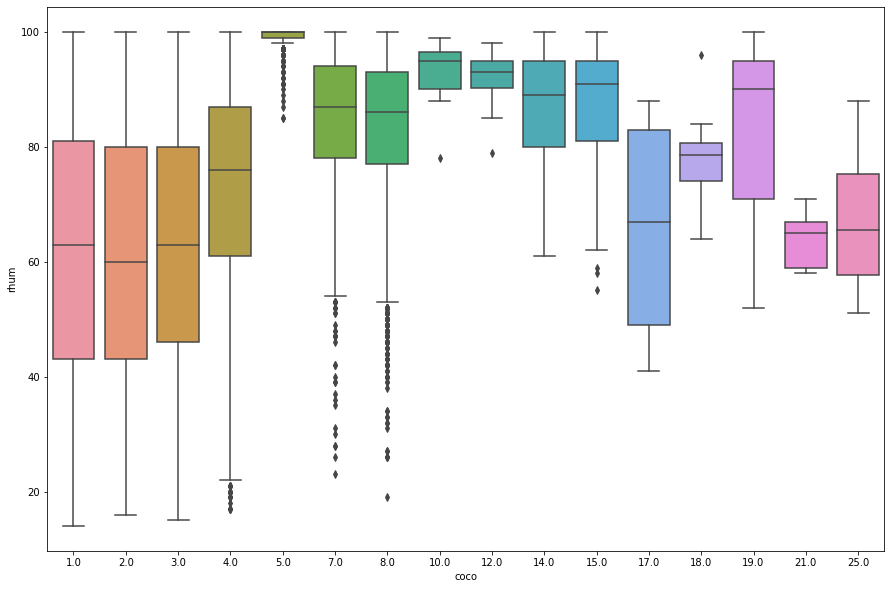

In [138]:
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.boxplot(data=df, x='coco', y='rhum')

<AxesSubplot:xlabel='coco', ylabel='pres'>

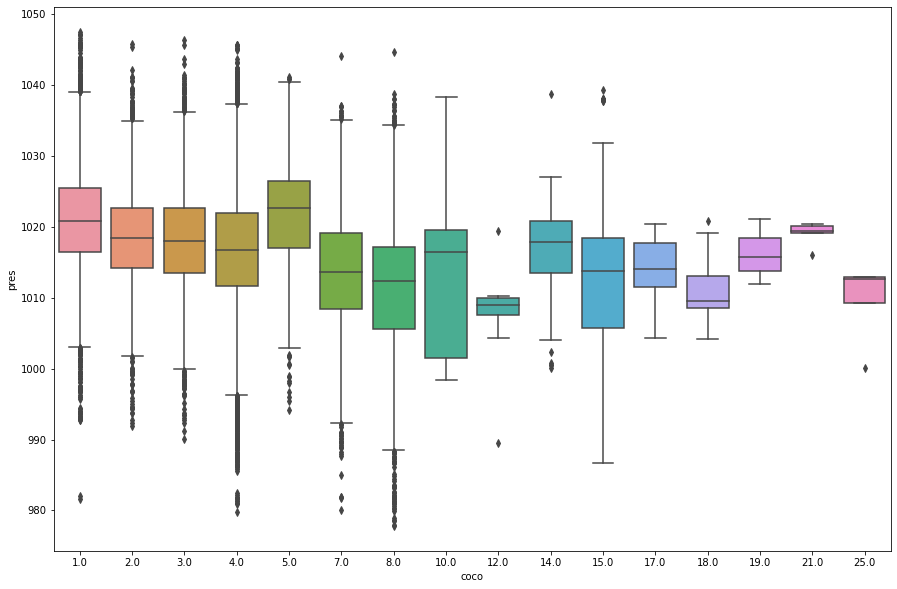

In [139]:
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.boxplot(data=df, x='coco', y='pres')

In [140]:
# spalte für das Wetter in der nächsten Stunde
# Wetter = Niederschlag + Sonne + Condition + snow

df['time+60'] = df.time+timedelta(minutes=60)
df

time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0     2017-01-01 00:00:00  -3.6  -3.9  98.0   0.0   NaN  150.0   6.5   NaN   
1     2017-01-01 01:00:00  -3.8  -3.9  99.0   0.0   NaN  140.0   7.9   NaN   
2     2017-01-01 02:00:00  -3.4  -3.5  99.0   0.0   NaN  140.0   7.2   NaN   
3     2017-01-01 03:00:00  -3.4  -3.5  99.0   0.0   NaN  160.0   6.5   NaN   
4     2017-01-01 04:00:00  -3.5  -3.6  99.0   0.0   NaN  150.0   5.4   NaN   
...                   ...   ...   ...   ...   ...   ...    ...   ...   ...   
51139 2022-11-01 19:00:00  11.4   8.3  81.0   0.0   0.0  140.0   6.8  11.0   
51140 2022-11-01 20:00:00  10.9   8.1  83.0   0.0   0.0  140.0   7.6  13.0   
51141 2022-11-01 21:00:00  10.3   8.2  87.0   0.0   0.0  140.0   7.9  13.0   
51142 2022-11-01 22:00:00  10.1   8.2  88.0   0.0   0.0  150.0  10.4  15.0   
51143 2022-11-01 23:00:00  10.3   7.9  85.0   0.0   0.0  150.0  10.4  16.0   

         pres  tsun  coco             time+60  
0      1030.1   NaN   NaN 2017-01-01 01:00:00  
1      1029.3   NaN   NaN 2017-01-01 02:00:00  
2      1028.6   NaN   NaN 2017-01-01 03:00:00  
3      1028.1   0.0   NaN 2017-01-01 04:00:00  
4      1027.4   0.0   NaN 2017-01-01 05:00:00  
...       ...   ...   ...                 ...  
51139  1022.1   0.0   1.0 2022-11-01 20:00:00  
51140  1022.0   0.0   1.0 2022-11-01 21:00:00  
51141  1022.6   0.0   1.0 2022-11-01 22:00:00  
51142  1022.9   0.0   4.0 2022-11-01 23:00:00  
51143  1022.8   0.0   4.0 2022-11-02 00:00:00  

[51144 rows x 13 columns]

In [141]:
#df_next_hour = df[['time+60', 'prcp','tsun','snow','coco']]
#df_next_hour

In [142]:
df_weather_next_hour = df.merge(df.drop('time',axis=1), left_on=['time'], right_on=['time+60'],suffixes=['_now','_next_hour'])
#df_weather_next_hour = df_weather_next_hour[['time','temp','dwpt','rhum','pres','prcp_next_hour','tsun_next_hour','snow_next_hour','coco_next_hour']]
df_weather_next_hour

time  temp_now  dwpt_now  rhum_now  prcp_now  snow_now  \
0     2017-01-01 01:00:00      -3.8      -3.9      99.0       0.0       NaN   
1     2017-01-01 02:00:00      -3.4      -3.5      99.0       0.0       NaN   
2     2017-01-01 03:00:00      -3.4      -3.5      99.0       0.0       NaN   
3     2017-01-01 04:00:00      -3.5      -3.6      99.0       0.0       NaN   
4     2017-01-01 05:00:00      -3.3      -3.4      99.0       0.0       NaN   
...                   ...       ...       ...       ...       ...       ...   
51138 2022-11-01 19:00:00      11.4       8.3      81.0       0.0       0.0   
51139 2022-11-01 20:00:00      10.9       8.1      83.0       0.0       0.0   
51140 2022-11-01 21:00:00      10.3       8.2      87.0       0.0       0.0   
51141 2022-11-01 22:00:00      10.1       8.2      88.0       0.0       0.0   
51142 2022-11-01 23:00:00      10.3       7.9      85.0       0.0       0.0   

       wdir_now  wspd_now  wpgt_now  pres_now  tsun_now  coco_now  \
0         140.0       7.9       NaN    1029.3       NaN       NaN   
1         140.0       7.2       NaN    1028.6       NaN       NaN   
2         160.0       6.5       NaN    1028.1       0.0       NaN   
3         150.0       5.4       NaN    1027.4       0.0       NaN   
4         150.0       6.8       NaN    1026.8       0.0       NaN   
...         ...       ...       ...       ...       ...       ...   
51138     140.0       6.8      11.0    1022.1       0.0       1.0   
51139     140.0       7.6      13.0    1022.0       0.0       1.0   
51140     140.0       7.9      13.0    1022.6       0.0       1.0   
51141     150.0      10.4      15.0    1022.9       0.0       4.0   
51142     150.0      10.4      16.0    1022.8       0.0       4.0   

              time+60_now  temp_next_hour  dwpt_next_hour  rhum_next_hour  \
0     2017-01-01 02:00:00            -3.6            -3.9            98.0   
1     2017-01-01 03:00:00            -3.8            -3.9            99.0   
2     2017-01-01 04:00:00            -3.4            -3.5            99.0   
3     2017-01-01 05:00:00            -3.4            -3.5            99.0   
4     2017-01-01 06:00:00            -3.5            -3.6            99.0   
...                   ...             ...             ...             ...   
51138 2022-11-01 20:00:00            10.6             7.7            82.0   
51139 2022-11-01 21:00:00            11.4             8.3            81.0   
51140 2022-11-01 22:00:00            10.9             8.1            83.0   
51141 2022-11-01 23:00:00            10.3             8.2            87.0   
51142 2022-11-02 00:00:00            10.1             8.2            88.0   

       prcp_next_hour  snow_next_hour  wdir_next_hour  wspd_next_hour  \
0                 0.0             NaN           150.0             6.5   
1                 0.0             NaN           140.0             7.9   
2                 0.0             NaN           140.0             7.2   
3                 0.0             NaN           160.0             6.5   
4                 0.0             NaN           150.0             5.4   
...               ...             ...             ...             ...   
51138             0.0             0.0           170.0             6.5   
51139             0.0             0.0           140.0             6.8   
51140             0.0             0.0           140.0             7.6   
51141             0.0             0.0           140.0             7.9   
51142             0.0             0.0           150.0            10.4   

       wpgt_next_hour  pres_next_hour  tsun_next_hour  coco_next_hour  \
0                 NaN          1030.1             NaN             NaN   
1                 NaN          1029.3             NaN             NaN   
2                 NaN          1028.6             NaN             NaN   
3                 NaN          1028.1             0.0             NaN   
4                 NaN          1027.4             0.0             NaN   
...

In [143]:
# Veränderung zur letzten Stunde erfassen
# Wenn temp_now höher negativ
df_weather_next_hour['temp_diff']=df_weather_next_hour.temp_next_hour - df_weather_next_hour.temp_now
df_weather_next_hour['rhum_diff']=df_weather_next_hour.rhum_next_hour - df_weather_next_hour.rhum_now
df_weather_next_hour['pres_diff']=df_weather_next_hour.pres_next_hour - df_weather_next_hour.pres_now
df_weather_next_hour['dwpt_diff']=df_weather_next_hour.dwpt_next_hour - df_weather_next_hour.dwpt_now
df_weather = df_weather_next_hour[['time','temp_now','dwpt_now','rhum_now','pres_now','temp_diff','rhum_diff','pres_diff','dwpt_diff'
,'prcp_next_hour','tsun_next_hour','snow_next_hour','coco_next_hour']]
df_weather

time  temp_now  dwpt_now  rhum_now  pres_now  temp_diff  \
0     2017-01-01 01:00:00      -3.8      -3.9      99.0    1029.3        0.2   
1     2017-01-01 02:00:00      -3.4      -3.5      99.0    1028.6       -0.4   
2     2017-01-01 03:00:00      -3.4      -3.5      99.0    1028.1        0.0   
3     2017-01-01 04:00:00      -3.5      -3.6      99.0    1027.4        0.1   
4     2017-01-01 05:00:00      -3.3      -3.4      99.0    1026.8       -0.2   
...                   ...       ...       ...       ...       ...        ...   
51138 2022-11-01 19:00:00      11.4       8.3      81.0    1022.1       -0.8   
51139 2022-11-01 20:00:00      10.9       8.1      83.0    1022.0        0.5   
51140 2022-11-01 21:00:00      10.3       8.2      87.0    1022.6        0.6   
51141 2022-11-01 22:00:00      10.1       8.2      88.0    1022.9        0.2   
51142 2022-11-01 23:00:00      10.3       7.9      85.0    1022.8       -0.2   

       rhum_diff  pres_diff  dwpt_diff  prcp_next_hour  tsun_next_hour  \
0           -1.0        0.8        0.0             0.0             NaN   
1            0.0        0.7       -0.4             0.0             NaN   
2            0.0        0.5        0.0             0.0             NaN   
3            0.0        0.7        0.1             0.0             0.0   
4            0.0        0.6       -0.2             0.0             0.0   
...          ...        ...        ...             ...             ...   
51138        1.0       -0.2       -0.6             0.0             0.0   
51139       -2.0        0.1        0.2             0.0             0.0   
51140       -4.0       -0.6       -0.1             0.0             0.0   
51141       -1.0       -0.3        0.0             0.0             0.0   
51142        3.0        0.1        0.3             0.0             0.0   

       snow_next_hour  coco_next_hour  
0                 NaN             NaN  
1                 NaN             NaN  
2                 NaN             NaN  
3                 NaN             NaN  
4                 NaN             NaN  
...               ...             ...  
51138             0.0             1.0  
51139             0.0             1.0  
51140             0.0             1.0  
51141             0.0             1.0  
51142             0.0             4.0  

[51143 rows x 13 columns]

<AxesSubplot:>

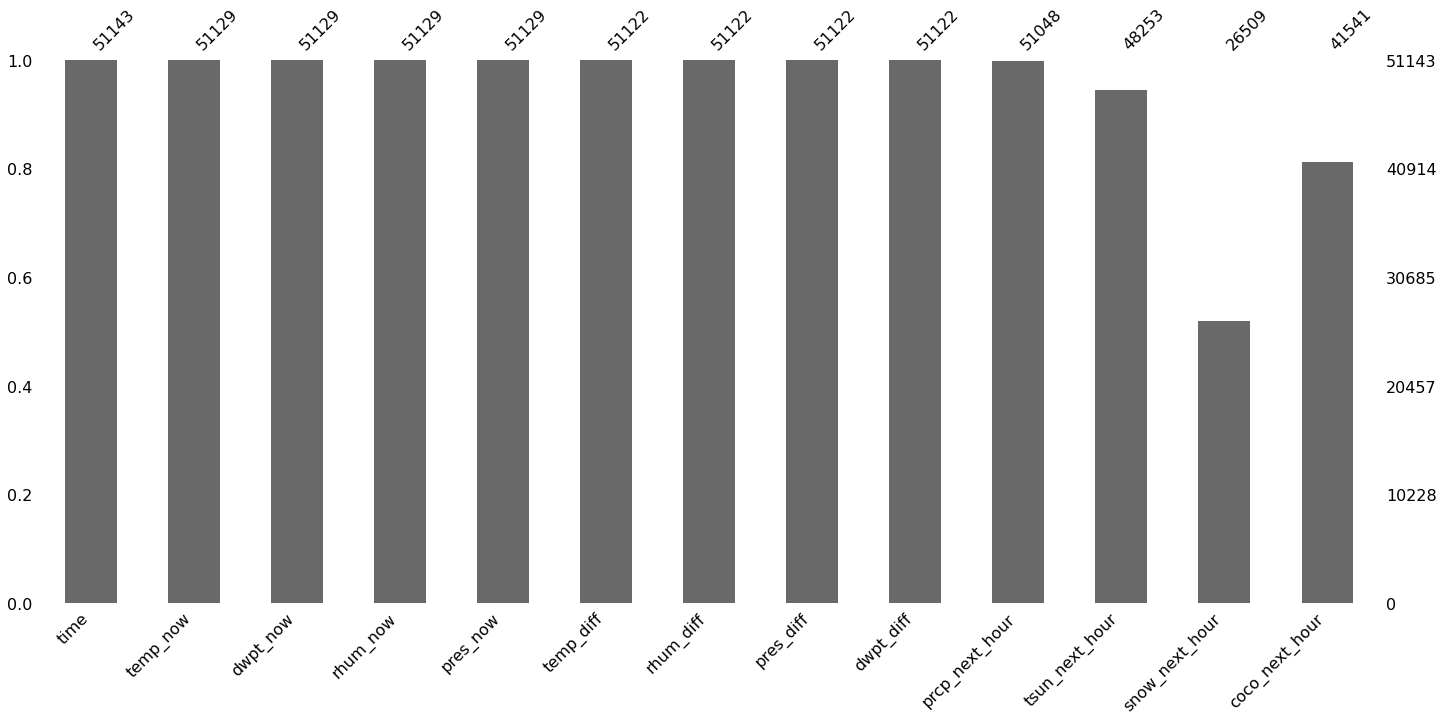

In [144]:
msno.bar(df_weather)

In [145]:
px.line(df_weather,'time','snow_next_hour')

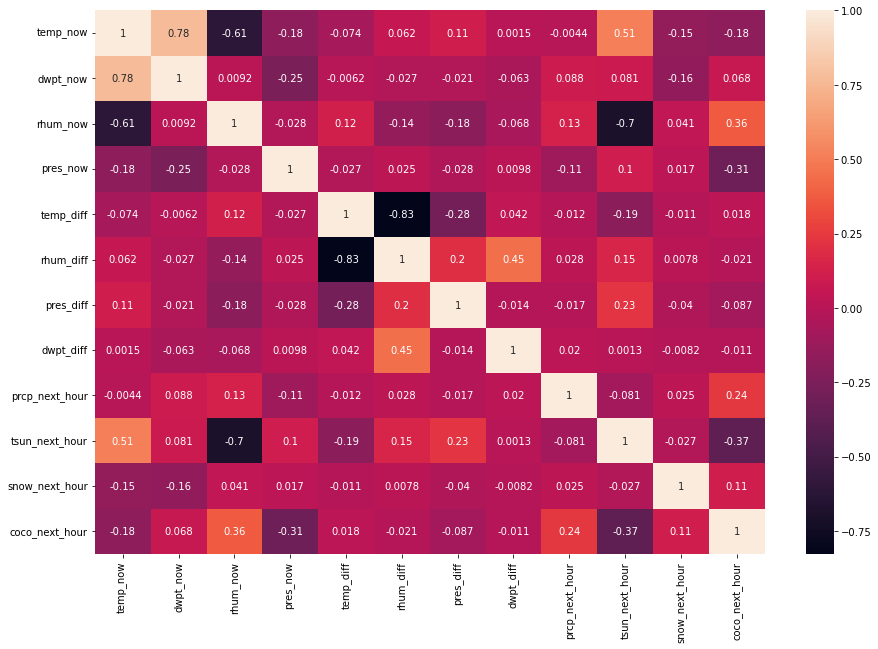

In [146]:
fig, ax = plt.subplots(1, figsize=(15, 10))
corr_matrix = df_weather.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [148]:
df_weather.to_pickle('weatherdata')